In [218]:
import ROOT
import numpy as np
import uproot3
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy
import time

In [219]:
root_file = "dav10.root"
file = uproot3.open(root_file)

In [220]:
file.keys()

[b'Truth_Vertex_PV_Selected;6',
 b'Truth_Vertex_PV_Selected;5',
 b'Reco_Vertex;4',
 b'Reco_Vertex;3',
 b'amvf;1']

In [221]:
file['amvf;1'].show()

diffx                      TStreamerSTL               asjagged(asdtype('>f4'), 10)
diffy                      TStreamerSTL               asjagged(asdtype('>f4'), 10)
diffz                      TStreamerSTL               asjagged(asdtype('>f4'), 10)
nRecoVtx                   (no streamer)              asdtype('>i4')
nTrueVtx                   (no streamer)              asdtype('>i4')
nVtxDetectorAcceptance     (no streamer)              asdtype('>i4')
nVtxReconstructable        (no streamer)              asdtype('>i4')
timeMS                     (no streamer)              asdtype('>i4')


In [222]:
file['Truth_Vertex_PV_Selected;6'].show()

event_id                   (no streamer)              asdtype('>i4')
truth_vtx_vx               TStreamerSTL               asjagged(asdtype('>f8'), 10)
truth_vtx_vy               TStreamerSTL               asjagged(asdtype('>f8'), 10)
truth_vtx_vz               TStreamerSTL               asjagged(asdtype('>f8'), 10)
truth_particle_Id          TStreamerSTL               asjagged(asdtype('>u8'), 10)
truth_particle_Type        TStreamerSTL               asjagged(asdtype('>i4'), 10)
truth_particle_process     TStreamerSTL               asjagged(asdtype('>u4'), 10)
truth_particle_vx          TStreamerSTL               asjagged(asdtype('>f8'), 10)
truth_particle_vy          TStreamerSTL               asjagged(asdtype('>f8'), 10)
truth_particle_vz          TStreamerSTL               asjagged(asdtype('>f8'), 10)
truth_particle_vt          TStreamerSTL               asjagged(asdtype('>f8'), 10)
truth_particle_p           TStreamerSTL               asjagged(asdtype('>f8'), 10)
truth_particle_px 

In [223]:
file['Reco_Vertex;4'].show()

event_id                   (no streamer)              asdtype('>i4')
reco_vtx_vx                TStreamerSTL               asjagged(asdtype('>f8'), 10)
reco_vtx_vy                TStreamerSTL               asjagged(asdtype('>f8'), 10)
reco_vtx_vz                TStreamerSTL               asjagged(asdtype('>f8'), 10)
reco_vtx_fitquality_chiSquared
                           TStreamerSTL               asjagged(asdtype('>f8'), 10)
reco_vtx_fitquality_nDoF   TStreamerSTL               asjagged(asdtype('>f8'), 10)
reco_vtx_err_vx_vx         TStreamerSTL               asjagged(asdtype('>f8'), 10)
reco_vtx_err_vx_vy         TStreamerSTL               asjagged(asdtype('>f8'), 10)
reco_vtx_err_vx_vz         TStreamerSTL               asjagged(asdtype('>f8'), 10)
reco_vtx_err_vy_vy         TStreamerSTL               asjagged(asdtype('>f8'), 10)
reco_vtx_err_vy_vz         TStreamerSTL               asjagged(asdtype('>f8'), 10)
reco_vtx_err_vz_vz         TStreamerSTL               asjagged(asdtype

In [224]:
event_amvf = [file["amvf;1"]["nRecoVtx"].array(), 
              file["amvf;1"]["nTrueVtx"].array(),
              file["amvf;1"]["nVtxReconstructable"].array(),
              file["amvf;1"]["diffx"].array(),
              file["amvf;1"]["diffy"].array(),
              file["amvf;1"]["diffz"].array()]

event_truth = [file["Truth_Vertex_PV_Selected;6"]["event_id"].array(),
               file["Truth_Vertex_PV_Selected;6"]["truth_vtx_vx"].array(),
               file["Truth_Vertex_PV_Selected;6"]["truth_vtx_vy"].array(),
               file["Truth_Vertex_PV_Selected;6"]["truth_vtx_vz"].array(),
               file["Truth_Vertex_PV_Selected;6"]["truth_vtx_fitted_trk_d0"].array(),
               file["Truth_Vertex_PV_Selected;6"]["truth_vtx_fitted_trk_z0"].array(),
               file["Truth_Vertex_PV_Selected;6"]["truth_vtx_fitted_trk_phi"].array(),
               file["Truth_Vertex_PV_Selected;6"]["truth_vtx_fitted_trk_theta"].array(),
               file["Truth_Vertex_PV_Selected;6"]["truth_vtx_fitted_trk_qp"].array(),
               file["Truth_Vertex_PV_Selected;6"]["truth_vtx_fitted_trk_time"].array(),
               file["Truth_Vertex_PV_Selected;6"]["truth_vtx_fitted_trk_vtxID"].array(),
               file["Truth_Vertex_PV_Selected;6"]["truth_vtx_fitted_trk_err_z0"].array()]

event_reco = [file["Reco_Vertex;4"]["event_id"].array(),
              file["Reco_Vertex;4"]["reco_vtx_vx"].array(),
              file["Reco_Vertex;4"]["reco_vtx_vy"].array(),
              file["Reco_Vertex;4"]["reco_vtx_vz"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_d0"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_z0"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_phi"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_theta"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_qp"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_time"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_vtxID"].array(), 
              file["Reco_Vertex;4"]["reco_vtx_fitquality_chiSquared"].array(),
              file["Reco_Vertex;4"]["reco_vtx_fitted_trk_trackWeight"].array(),
              file["Reco_Vertex;4"]["reco_vtx_err_vz_vz"].array()]

event_amvf = np.expand_dims(event_amvf, axis = -1)
event_amvf = event_amvf.transpose((1,0,2))
event_amvf = np.squeeze(event_amvf, axis= (2,))

event_truth = np.expand_dims(event_truth, axis = -1)
event_truth = event_truth.transpose((1,0,2))
event_truth = np.squeeze(event_truth, axis= (2,))

event_reco = np.expand_dims(event_reco, axis = -1)
event_reco = event_reco.transpose((1,0,2))
event_reco = np.squeeze(event_reco, axis= (2,))

In [225]:
_nRecoVtx, _nTrueVtx, _nVtxReconstructible, _diffx, _diffy, _diffz = 0, 1, 2, 3, 4, 5
_event_id, _truth_vtx_vx, _truth_vtx_vy, _truth_vtx_vz, _truth_trk_d0, _truth_trk_z0, _truth_trk_phi, _truth_trk_theta, _truth_trk_qp, _truth_trk_time, _truth_trk_vtxid, _truth_ptc_p, _truth_ptc_px, _truth_ptc_py, _truth_ptc_pz, _truth_ptc_pt = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15
_event_id, _reco_vtx_vx, _reco_vtx_vy, _reco_vtx_vz, _reco_trk_d0, _reco_trk_z0, _reco_trk_phi, _reco_trk_theta, _reco_trk_qp, _reco_trk_time, _reco_trk_vtxid, _reco_chi2, _reco_trkweight = 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12

In [226]:
# save truth and reco tracks information into [[[[1, 1, 1, 1, 1], [1, 1, 1, 1, 1]]]]
time_start = time.time()
vtx_reco, trk_reco, trk_weight_reco, trk_weight_sum_reco, hs_trk_reco, hs_vtx_reco = [], [], [], [], [], []

for i in range(len(event_reco)):
    num_trk = np.bincount(event_reco[i][_reco_trk_vtxid])
    vtx_trk_info_tmp, vtx_trk_weight_tmp, trk_weight_sum_tmp, trk_weight_sum_reco_vtx_tmp, vtx_reco_tmp = [], [], [], [], []
    trk_count, m0 = 0, 0
    for j in range(len(event_reco[i][_reco_vtx_vx])):
        trk_info_tmp, trk_weight_tmp = [], []

        pt = 1 / (np.abs(event_reco[i][_reco_trk_qp][trk_count:(trk_count+num_trk[j])])) * np.sin(event_reco[i][7][trk_count:(trk_count+num_trk[j])])
        mpt = sum([i ** 2 for i in pt])
        
        trk_weight_sum_reco_vtx_tmp.append(sum(event_reco[i][_reco_trkweight][trk_count:(trk_count + num_trk[j])]))
        vtx_reco_tmp.append([event_reco[i][_reco_vtx_vx][j], event_reco[i][_reco_vtx_vy][j], event_reco[i][_reco_vtx_vz][j]])
        
        for k in range(num_trk[j]):
            trk_info_tmp.append([event_reco[i][_reco_trk_d0][trk_count + k], event_reco[i][_reco_trk_z0][trk_count + k], event_reco[i][_reco_trk_phi][trk_count + k], 
                                 event_reco[i][_reco_trk_theta][trk_count + k], event_reco[i][_reco_trk_qp][trk_count + k]])
            trk_weight_tmp.append(event_reco[i][_reco_trkweight][trk_count + k])
        
        if mpt > m0:
            hs_trk_tmp = []
            hs_vtx_tmp = [event_reco[i][_reco_vtx_vx][j], event_reco[i][_reco_vtx_vy][j], event_reco[i][_reco_vtx_vz][j]]
            for k in range(num_trk[j]):
                hs_trk_tmp.append([event_reco[i][_reco_trk_d0][trk_count + k], event_reco[i][_reco_trk_z0][trk_count + k], event_reco[i][_reco_trk_phi][trk_count + k], 
                                     event_reco[i][_reco_trk_theta][trk_count + k], event_reco[i][_reco_trk_qp][trk_count + k]])
            m0 = mpt
            
        vtx_trk_info_tmp.append(trk_info_tmp)
        vtx_trk_weight_tmp.append(trk_weight_tmp)
        
        trk_count += num_trk[j]
        
    vtx_reco.append(vtx_reco_tmp)
    trk_reco.append(vtx_trk_info_tmp)
    trk_weight_reco.append(vtx_trk_weight_tmp)
    trk_weight_sum_reco.append(trk_weight_sum_reco_vtx_tmp)
    hs_trk_reco.append(hs_trk_tmp)
    hs_vtx_reco.append(hs_vtx_tmp)
    
vtx_truth_vz, trk_truth, hs_trk_truth, pt_truth, hs_vtx_truth = [], [], [], [], []
for i in range(len(event_truth)):
    num_trk = np.bincount(event_truth[i][_truth_trk_vtxid])
    vtx_trk_info_tmp, momentum, vtx_truth_vz_tmp = [], [], []
    trk_count, m0 = 0, 0
    for j in range(len(event_truth[i][_truth_vtx_vx])):
        trk_info_tmp = []
        pt = 1 / (np.abs(event_truth[i][_truth_trk_qp][trk_count:(trk_count+num_trk[j])])) * np.sin(event_truth[i][_truth_trk_theta][trk_count:(trk_count+num_trk[j])])
        momentum.append(pt)
        mpt = sum([i ** 2 for i in pt])
        
        vtx_truth_vz_tmp.append(event_truth[i][_truth_vtx_vz][j])
        
        for k in range(num_trk[j]):
            trk_info_tmp.append([event_truth[i][_truth_trk_d0][trk_count + k], event_truth[i][_truth_trk_z0][trk_count + k], event_truth[i][_truth_trk_phi][trk_count + k], 
                                 event_truth[i][_truth_trk_theta][trk_count + k], event_truth[i][_truth_trk_qp][trk_count + k]])
        
        if mpt > m0:
            hs_trk_tmp = []
            hs_vtx_tmp = [event_truth[i][_truth_vtx_vx][j], event_truth[i][_truth_vtx_vy][j], event_truth[i][_truth_vtx_vz][j]]
            for k in range(num_trk[j]):
                hs_trk_tmp.append([event_truth[i][_truth_trk_d0][trk_count + k], event_truth[i][_truth_trk_z0][trk_count + k], event_truth[i][_truth_trk_phi][trk_count + k], 
                                 event_truth[i][_truth_trk_theta][trk_count + k], event_truth[i][_truth_trk_qp][trk_count + k]])
            m0 = mpt
        
        vtx_trk_info_tmp.append(trk_info_tmp)
        trk_count += num_trk[j]
    vtx_truth_vz.append(vtx_truth_vz_tmp)
    pt_truth.append(momentum)
    trk_truth.append(vtx_trk_info_tmp)
    hs_trk_truth.append(hs_trk_tmp)
    hs_vtx_truth.append(hs_vtx_tmp)

time_elapsed = (time.time() - time_start)
print("time_elapsed:", time_elapsed, 'seconds')

/tmp/ipykernel_305/2961141514.py:50: RuntimeWarning: divide by zero encountered in true_divide
  pt = 1 / (np.abs(event_truth[i][_truth_trk_qp][trk_count:(trk_count+num_trk[j])])) * np.sin(event_truth[i][_truth_trk_theta][trk_count:(trk_count+num_trk[j])])
/tmp/ipykernel_305/2961141514.py:50: RuntimeWarning: invalid value encountered in multiply
  pt = 1 / (np.abs(event_truth[i][_truth_trk_qp][trk_count:(trk_count+num_trk[j])])) * np.sin(event_truth[i][_truth_trk_theta][trk_count:(trk_count+num_trk[j])])
/tmp/ipykernel_305/2961141514.py:50: RuntimeWarning: overflow encountered in true_divide
  pt = 1 / (np.abs(event_truth[i][_truth_trk_qp][trk_count:(trk_count+num_trk[j])])) * np.sin(event_truth[i][_truth_trk_theta][trk_count:(trk_count+num_trk[j])])


time_elapsed: 85.97301030158997 seconds


In [227]:
# testing
print(trk_weight_reco[0])

[[0.9885664098120416, 0.9878101609646782, 0.9474706303390734, 0.9695250715105278, 0.978670706972723, 0.8606916746699247, 0.17412657296559014, 0.9587933262655028, 0.9849073086387828, 0.9790341580260621, 0.986050666466238, 0.9859762383302492, 0.9866560221712994, 0.9445986030974703, 0.9862673734369589, 0.9505593473205826, 0.9472860846579229, 0.9824121118333596, 0.18108640649516208, 8.540284816245447e-05, 0.15333706367332398, 0.004596113692653412, 0.9621863991536393, 0.9799158408638645, 0.9855302509556911, 0.6431460175998499, 0.9814995389226223, 0.9816214943211176, 0.9745857375074614, 4.245493291460981e-05, 0.6288645816385228, 0.9886737614042114, 0.9886503925080855, 0.8832411593066902, 0.9744517496942676, 0.9112152749128283, 0.9725769960257852, 0.9170604478438835, 0.959265494081878, 0.9673656769265799, 0.9886710311745147, 0.3522089209806404, 0.9813880397263116, 0.9870798462292574, 0.9877202720572067, 0.9745078717774697, 0.7754266406325099, 0.9653360495657346, 0.9675806731213115, 0.87150399

mean= 0.9934409229049306
standard deviation= 0.027140979659441435


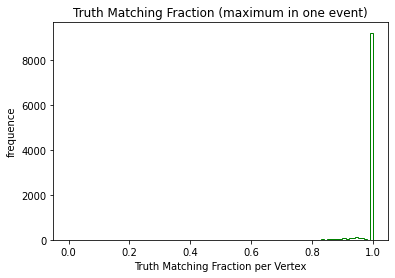

time_elapsed 8.935644388198853 seconds


In [228]:
time_start = time.time()
m = []
for l in range(len(trk_truth)):
    fraction = []
    for j in range(len(trk_truth[l])):
        num_trk_associated = []
        for k in range(len(trk_reco[l])):
            num_trk_associated.append(len([i for i, val in enumerate(trk_reco[l][k]) if val in trk_truth[l][j]]))
        fraction.append(max(num_trk_associated)/len(trk_truth[l][j])) # change to vertex
    m.append(max(fraction))
        
(mean, stadev) = norm.fit(m)
print('mean=', mean)
print('standard deviation=', stadev)
bin = np.linspace(0, 1, 101)
plt.hist(m, bins=bin, color='green', histtype='step', label='number of vertex')
plt.title('Truth Matching Fraction (maximum in one event)')
plt.xlabel('Truth Matching Fraction per Vertex')
plt.ylabel('frequence')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
time_elapsed = (time.time() - time_start)
print('time_elapsed', time_elapsed, 'seconds')

In [229]:
print('number of data inputs', len(m))

number of data inputs 10000


mean= 0.8459593639190216
standard deviation= 0.255557954067621


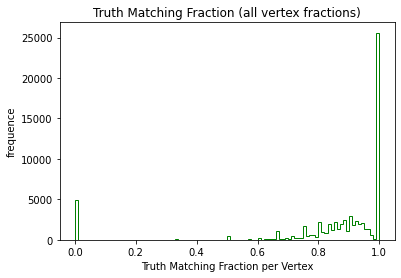

time_elapsed 8.777175664901733 seconds


In [230]:
time_start = time.time()
m, vtx0 = [], []
for l in range(len(trk_truth)):
    for j in range(len(trk_truth[l])):
        num_trk_associated = []
        for k in range(len(trk_reco[l])):
            # trk_common = [a for a in trk_reco[i][j] if a in trk_truth[i][j]]
            num_trk_associated.append(len([i for i, val in enumerate(trk_reco[l][k]) if val in trk_truth[l][j]]))
        m.append(max(num_trk_associated)/len(trk_truth[l][j])) # change to vertex
        
(mean, stadev) = norm.fit(m)
print('mean=', mean)
print('standard deviation=', stadev)
bin = np.linspace(0, 1, 101)
plt.hist(m, bins=bin, color='green', histtype='step', label='number of vertex')
plt.title('Truth Matching Fraction (all vertex fractions)')
plt.xlabel('Truth Matching Fraction per Vertex')
plt.ylabel('frequence')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
time_elapsed = (time.time() - time_start)
print('time_elapsed', time_elapsed, 'seconds')

In [231]:
print('number of input data:', len(m))

number of input data: 68777


In [232]:
print(hs_vtx_truth[0])
print(len(trk_truth[0][1]))

[0.00881008617579937, 0.01478538941591978, 46.51725387573242]
4


mean= 0.8363714272929988
standard deviation= 0.08778067984522908


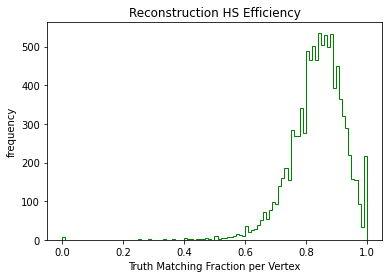

time_elapsed: 2.7138671875 seconds
10000


In [233]:
# Reco_HS_Efficiency = Number of Reconstructable truth HS vertex which is associated to Reconstructed Vertex / Number of Reconstructable truth HS vertex
time_start = time.time()
m, hs_vtx_truth_associated_event_num = [], []
for l in range(len(hs_trk_truth)):
    num_trk_associated = []
    
    for k in range(len(trk_reco[l])):
        # trk_common = [a for a in trk_reco[i][j] if a in trk_truth[i][j]]
        num_trk_associated.append(len([i for i, val in enumerate(trk_reco[l][k]) if val in hs_trk_truth[l]]))
        
    max_hs_fraction = max(num_trk_associated)/len(hs_trk_truth[l])
    m.append(max_hs_fraction)
    if max_hs_fraction > 0.7:
        hs_vtx_truth_associated_event_num.append(l)
    
(mean, stadev) = norm.fit(m)
print('mean=', mean)
print('standard deviation=', stadev)
bin = np.linspace(0, 1, 101)
plt.hist(m, bins=bin, color='green', histtype='step', label='number of vertex')
plt.title('Reconstruction HS Efficiency')
plt.xlabel('Truth Matching Fraction per Vertex')
plt.ylabel('frequency')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
time_elapsed = (time.time() - time_start)
print('time_elapsed:',time_elapsed, 'seconds')
print(len(m))

In [234]:
print('hs_fraction > 0.7 out of 10,000:', len(hs_vtx_truth_associated_event_num))

hs_fraction > 0.7 out of 10,000: 9383


In [235]:
def dist_cal(list1, list2):
    dist = np.sqrt((list1[0]-list2[0])**2 + (list1[1]-list2[1])**2 + (list1[2]-list2[2])**2)
    return dist

def print_out(list1, list2):
    print("diff_x:", list1[0]-list2[0], "diff_y", list1[1]-list2[1], "diff_z", list1[2]-list2[2])

In [236]:
# testing
m = []
for i in range(10000):
    hs_dist = dist_cal(hs_vtx_truth[i], hs_vtx_reco[i])
    pu_dist = []
    for j in range(len(vtx_reco[i])):
        pu_dist.append(dist_cal(hs_vtx_truth[i], vtx_reco[i][j]))
    
    if hs_dist <= 0.1 and min(pu_dist) == hs_dist:
        m.append(1)
print(len(m))

9522


In [237]:
# testing
m = []
for i in hs_vtx_truth_associated_event_num:
    hs_dist = dist_cal(hs_vtx_truth[i], hs_vtx_reco[i])
    pu_dist = []
    for j in range(len(vtx_reco[i])):
        pu_dist.append(dist_cal(hs_vtx_truth[i], vtx_reco[i][j]))
    
    if hs_dist <= 0.1:
        m.append(1)
print(len(m))

9047


/tmp/ipykernel_305/2979097591.py:39: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  TEff1.Fill(Reco, localPUDensity);
/tmp/ipykernel_305/2979097591.py:40: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  TEff2.Fill(Reco, localPUDensity);
/tmp/ipykernel_305/2979097591.py:41: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  TEff3.Fill(Reco, localPUDensity);


time_elapsed: 3.951261520385742 seconds


Warning in <TCanvas::Constructor>: Deleting canvas with same name: fillhist


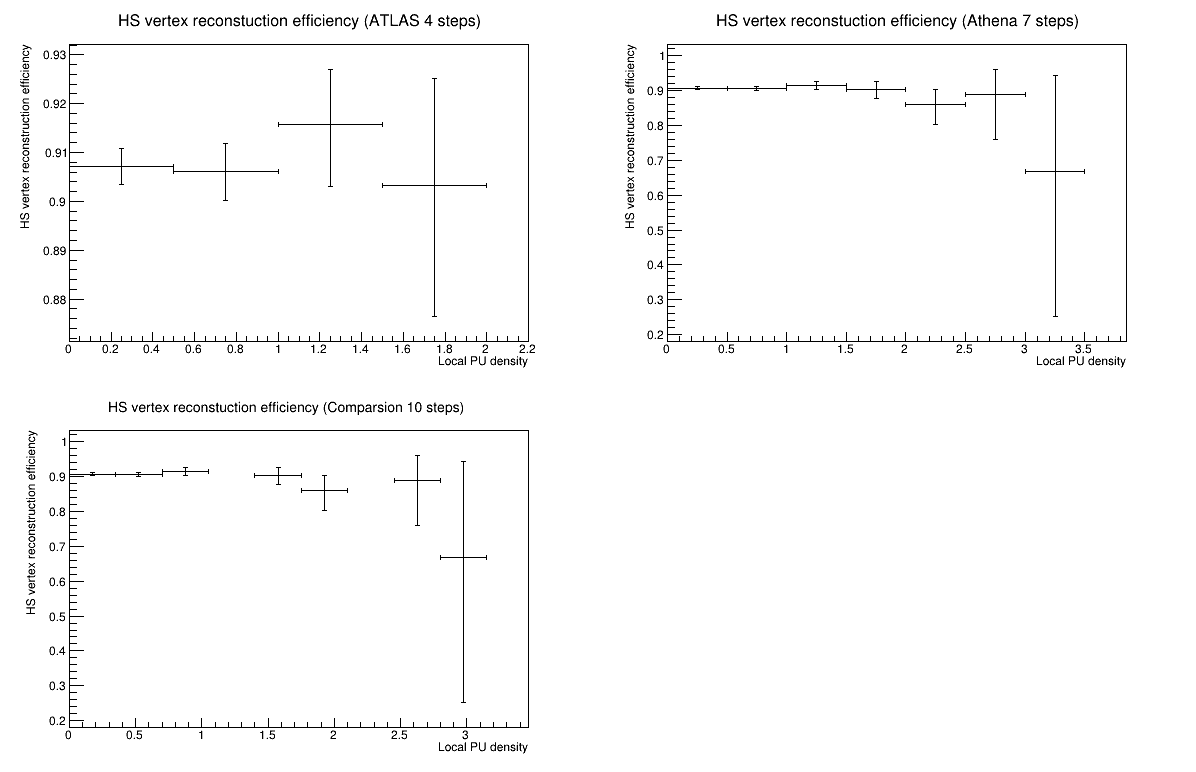

In [238]:
#To successfully reconstruct a HS, 3 tests are done: 
# 1. |reco_HS - truth_HS| < 0.1 mm
# 2. Reconstructable truth HS vertex which is associated to Reconstructed Vertex (TruthMatch fraction for HS vertex > 0.7)

# local pile-up density near a vertex, defined as the number of generated vertices per unit length within a symmetrical ±2 mm longitudinal window
time_start = time.time()
c = ROOT.TCanvas("fillhist", "title1", 1200, 800)
#c.SetFillStyle(1001)
TEff1 = ROOT.TEfficiency("eff", "HS vertex reconstuction efficiency (ATLAS 4 steps);Local PU density;HS vertex reconstruction efficiency", 4, 0, 2)
TEff2 = ROOT.TEfficiency("eff", "HS vertex reconstuction efficiency (Athena 7 steps);Local PU density;HS vertex reconstruction efficiency", 7, 0, 3.5)
TEff3 = ROOT.TEfficiency("eff", "HS vertex reconstuction efficiency (Comparsion 10 steps);Local PU density;HS vertex reconstruction efficiency", 10, 0, 3.5)

long_window = 2
for l in range(len(vtx_truth)):
    #localPUDensity
    nTracksInWindow = 0
    
    long_dist = vtx_truth_vz[l]
    long_dist = [np.abs(long_dist[i]-j) for i in range(len(long_dist)) for j in long_dist[i+1:]]
    nTracksInWindow = len([i for i in long_dist if i < long_window])
    
    localPUDensity = nTracksInWindow/long_window
    
    
    #Reco Test
    hs_dist = dist_cal(hs_vtx_truth[l], hs_vtx_reco[l])
    
    pu_dist = []
    for j in range(len(vtx_reco[l])):
        pu_dist.append(dist_cal(hs_vtx_truth[l], vtx_reco[l][j]))
    
    num_trk_associated = []
    for k in range(len(trk_reco[l])):
        # trk_common = [a for a in trk_reco[i][j] if a in trk_truth[i][j]]
        num_trk_associated.append(len([i for i, val in enumerate(trk_reco[l][k]) if val in hs_trk_truth[l]]))

    Reco = hs_dist <= 0.1 and max(num_trk_associated)/len(hs_trk_truth[l]) >= 0.7 
    # hs_dist <= 0.1 and min(pu_dist) == hs_dist
    TEff1.Fill(Reco, localPUDensity);
    TEff2.Fill(Reco, localPUDensity);
    TEff3.Fill(Reco, localPUDensity);

c.Divide(2, 2)
c.cd(1); TEff1.Draw()
c.cd(2); TEff2.Draw()
c.cd(3); TEff3.Draw()
c.Draw()

time_elapsed = (time.time() - time_start)
print('time_elapsed:',time_elapsed, 'seconds')

In [239]:
# testing
t1 = [1, 2, 4, 8, 16, 32, 64, 128, 256]
result = [np.abs(t1[i]-j) for i in range(len(t1)) for j in t1[i+1:]]
print(result)
dist = []
for j in range(len(t1)-1):
    for k in range(j+1, len(t1)):
        dist.append(np.abs(t1[j]-t1[k]))
print(dist)

[1, 3, 7, 15, 31, 63, 127, 255, 2, 6, 14, 30, 62, 126, 254, 4, 12, 28, 60, 124, 252, 8, 24, 56, 120, 248, 16, 48, 112, 240, 32, 96, 224, 64, 192, 128]
[1, 3, 7, 15, 31, 63, 127, 255, 2, 6, 14, 30, 62, 126, 254, 4, 12, 28, 60, 124, 252, 8, 24, 56, 120, 248, 16, 48, 112, 240, 32, 96, 224, 64, 192, 128]


/tmp/ipykernel_305/3056873814.py:35: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  TEff1.Fill(Sel, localPUDensity);
/tmp/ipykernel_305/3056873814.py:36: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  TEff2.Fill(Sel, localPUDensity);
/tmp/ipykernel_305/3056873814.py:37: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  TEff3.Fill(Sel, localPUDensity);
Warning in <TCanvas::Constructor>: Deleting canvas with same name: fillhist


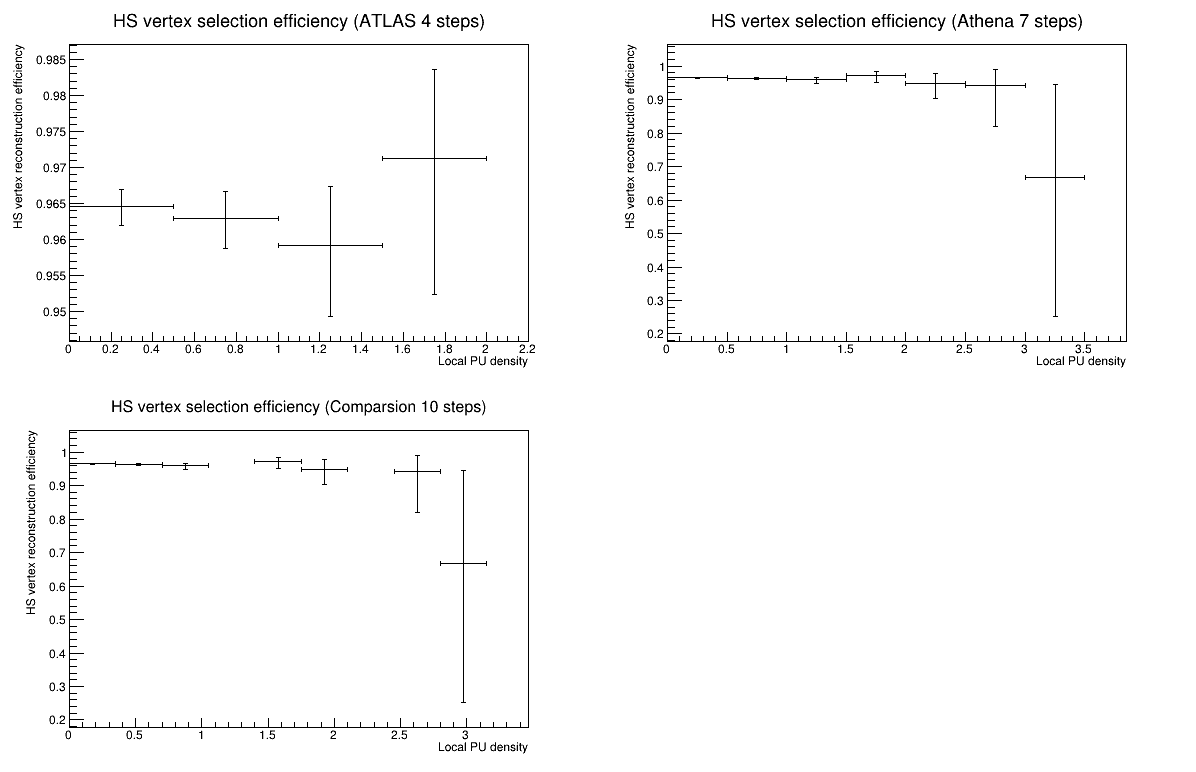

In [241]:
# Selection Efficiency
# loop around all Reconstructable truth HS vertex which is associated to Reconstructed Vertex (all vertex > 0.7)
# test 1(ATLAS): the reconstructed vertex with highest pT2 is the one containing the largest total weight from true HS tracks. 
# problem(ATLAS): don't have truth track weight 
# test 1(Athena): HS reconstructed vertices == |reco - truth_HS| < 0.1 mm
# or reco_HS is the closest vertex to the truth_HS among all the vertices reconstructed in that event


c = ROOT.TCanvas("fillhist", "title", 1200, 800)
#c.SetFillStyle(1001)
TEff1 = ROOT.TEfficiency("eff", "HS vertex selection efficiency (ATLAS 4 steps);Local PU density;HS vertex reconstruction efficiency", 4, 0, 2)
TEff2 = ROOT.TEfficiency("eff", "HS vertex selection efficiency (Athena 7 steps);Local PU density;HS vertex reconstruction efficiency", 7, 0, 3.5)
TEff3 = ROOT.TEfficiency("eff", "HS vertex selection efficiency (Comparsion 10 steps);Local PU density;HS vertex reconstruction efficiency", 10, 0, 3.5)

long_window = 2
for l in hs_vtx_truth_associated_event_num:
    #localPUDensity
    nTracksInWindow = 0
    
    long_dist = vtx_truth_vz[l]
    long_dist = [np.abs(long_dist[i]-j) for i in range(len(long_dist)) for j in long_dist[i+1:]]
    nTracksInWindow = len([i for i in long_dist if i < long_window])
    
    localPUDensity = nTracksInWindow/long_window
    
    #Sel Test
    hs_dist = dist_cal(hs_vtx_truth[l], hs_vtx_reco[l])
    
    pu_dist = []
    for j in range(len(vtx_reco[l])):
        pu_dist.append(dist_cal(hs_vtx_truth[l], vtx_reco[l][j]))
    

    Sel = min(pu_dist) == hs_dist
    TEff1.Fill(Sel, localPUDensity);
    TEff2.Fill(Sel, localPUDensity);
    TEff3.Fill(Sel, localPUDensity);

c.Divide(2, 2)
c.cd(1); TEff1.Draw()
c.cd(2); TEff2.Draw()
c.cd(3); TEff3.Draw()
c.Draw()